In [1]:
import numpy as np


In [2]:
N = 3

# hidden probabilities
means = np.array([0.7, 0.8, 0.5])
probs = np.zeros(N)
# number of successes for each machine
S = np.zeros(N, dtype=np.int)
# number of failures for each machine
F = np.zeros(N, dtype=np.int)

rnd = np.random.RandomState(7)

In [30]:
num_trials = 1000
total_wins = 0
wins = np.zeros(num_trials)

for trial in range(num_trials):
    #print("Trial {}".format(trial))
    for i in range(N):
        probs[i] = rnd.beta(S[i] + 1, F[i] + 1)
        #probs[i] = np.random.beta(S[i]+1, F[i]+1)
    #print(probs)
    machine = np.argmax(probs)
    #print("Playing machine " + str(machine))
    
    # draw from a random uniform distribution
    p = rnd.random_sample()
    if p < means[machine]:
        #print(" -- win")
        S[machine] += 1
        total_wins += 1
    else:
        #print(" -- lose")
        F[machine] += 1
        
    wins[trial] = (total_wins)/(trial+1)
        
print("Total wins {}".format(total_wins))

Total wins 791


In [31]:
import matplotlib
import matplotlib.pyplot as plt

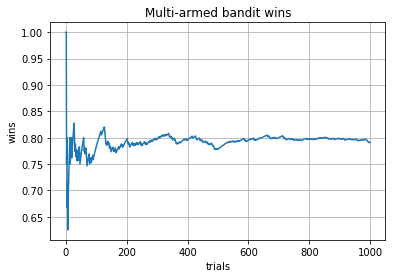

In [32]:
fig, ax = plt.subplots()
ax.plot(wins)

ax.set(xlabel='trials', ylabel='wins',
       title='Multi-armed bandit wins')
ax.grid()

fig.savefig("test.png")
plt.show()

In [6]:
print(probs)

[0.66937381 0.7868906  0.4870681 ]


Text(0,0.5,'Probability')

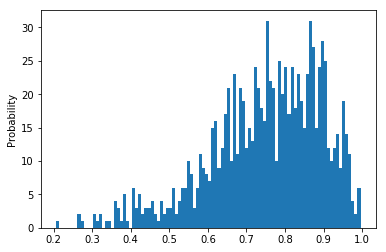

In [20]:
samples = np.random.beta(6, 2, 1000)

%matplotlib inline
n_bins = 100
plt.hist(samples, bins=n_bins)
plt.ylabel('Probability')